# CAPÍTULO 1: Introducción

*Noemi González Lois*

**Base de Datos: mammographic_masses**

**MÓDULOS**

In [1]:
# Importación de módulos necesarios
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Ignorar advertencias de futuras versiones
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### VISUALIZACIÓN DE LOS DATOS

In [2]:
# Definimos los nombres de las columnas y leemos el archivo CSV
features = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
df = pd.read_csv('mammographic_masses.csv', header=0, names=features)

# Mostramos los primeros 5 registros del DataFrame
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [3]:
# Obtenemos las dimensiones de la base de datos
num_filas, num_columnas = df.shape

# Imprimimos la cantidad de observaciones y atributos
print('La base de datos tiene', num_filas, 'observaciones y', num_columnas, 'atributos')

La base de datos tiene 961 observaciones y 6 atributos


### Valores perdidos, nulos o anómalos

In [4]:
# Contamos el número de valores únicos para cada variable en el DataFrame
df.nunique()

BI-RADS      8
Age         74
Shape        5
Margin       6
Density      5
Severity     2
dtype: int64

In [5]:
# Iteramos sobre cada atributo en la lista de características
for i in features:
    # Imprimimos el nombre del atributo
    print('Atributo:', i)
    
    # Contamos y mostramos el número de veces que se toma cada valor para el atributo actual
    # Los resultados se muestran ordenados de mayor a menor frecuencia
    print(df[i].value_counts()) 
    
    # Imprimimos una línea divisoria para separar la salida para cada atributo
    print('______________________________')

Atributo: BI-RADS
BI-RADS
4     547
5     345
3      36
2      14
6      11
0       5
?       2
55      1
Name: count, dtype: int64
______________________________
Atributo: Age
Age
59    36
67    32
57    32
66    31
46    28
      ..
18     1
82     1
93     1
96     1
20     1
Name: count, Length: 74, dtype: int64
______________________________
Atributo: Shape
Shape
4    400
1    224
2    211
3     95
?     31
Name: count, dtype: int64
______________________________
Atributo: Margin
Margin
1    357
4    280
5    136
3    116
?     48
2     24
Name: count, dtype: int64
______________________________
Atributo: Density
Density
3    798
?     76
2     59
1     16
4     12
Name: count, dtype: int64
______________________________
Atributo: Severity
Severity
0    516
1    445
Name: count, dtype: int64
______________________________


A continuación utilizo dos funciones para sacar el número de valores nulos o NaN de nuestra BD. Por ahora no son útiles porque éstos están representados por signos de interrogación y no por 0's o NaN.

In [6]:
# Calculamos la cantidad de valores nulos en cada columna del DataFrame
nulos_por_columna = df.isnull().sum()

# Mostramos el número de valores nulos en cada columna
print(nulos_por_columna)

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64


In [7]:
# Calculamos la cantidad de valores nulos (NaN) en cada columna del DataFrame
valores_nulos_por_columna = df.isna().sum()

# Mostramos el número de valores nulos en cada columna
print(valores_nulos_por_columna)

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64


### PREPROCESAMIENTO DE LOS DATOS

Este paso es necesario para visualizar el histograma de los datos, ya que tenemos valores del tipo str para los valores perdidos, por lo que al utilizar los datos dará un error debido a eso.
Vamos a **imputar** los valores anómalos o perdidos por la media.

In [8]:
df['BI-RADS'] = df['BI-RADS'].replace('55', float('0.0'))
# Reemplazar '?' con NaN para manejar los valores faltantes correctamente
df.replace('?', np.nan, inplace=True)

for i in features:    
    # Convertir la columna a valores numéricos
    df[i] = pd.to_numeric(df[i], errors='coerce')
    
    # Calcular la mediana excluyendo NaNs
    mediana = df[i].median(skipna=True)
    
    # Reemplazar NaNs y 0.0s con la mediana
    df[i].fillna(mediana, inplace=True)
    df[i].replace(0.0, mediana, inplace=True)
    
    # Convertir la columna a int64
    df[i] = df[i].astype('int64')

In [9]:
df.nunique() #Número de valores diferentes que hay para cada variable de la BD

BI-RADS      5
Age         73
Shape        4
Margin       5
Density      4
Severity     2
dtype: int64

HISTOGRAMA

In [10]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,3,1


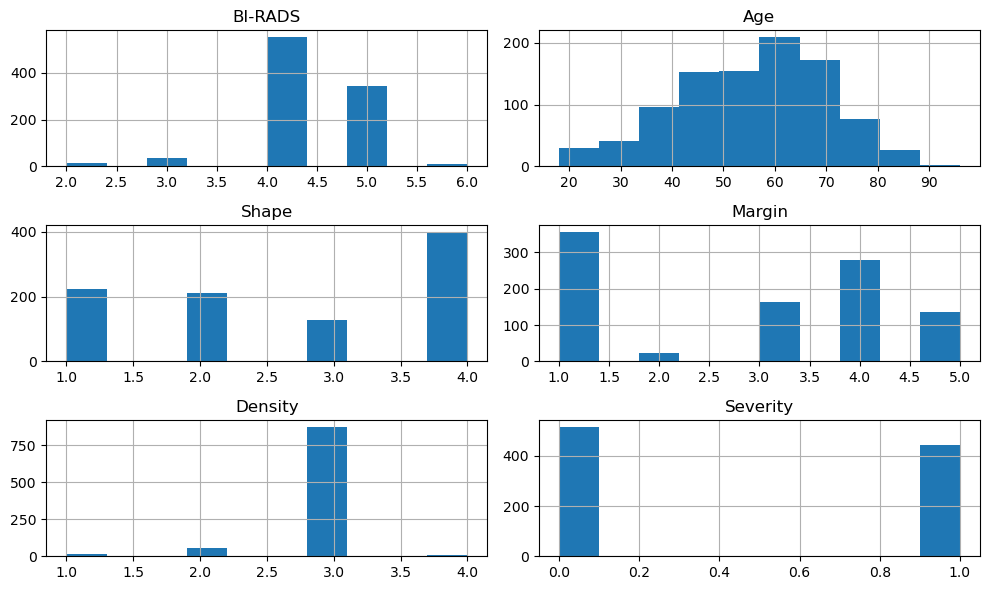

In [11]:
import matplotlib.pyplot as plt

# Trazar histogramas para todas las variables en el DataFrame
df.hist(figsize=(10, 6))  # Especifica el tamaño de la figura

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los histogramas
plt.show()

DIAGRAMA DE DISPERSIÓN

En este gráfico podemos ver, en la diagonal, el histograma de cada par de variables separadas según el valor de Severity.

El resto son diagramas de dispersión. La finalidad de estos era buscar si existe relación lineal o no lineal entre algún par de variables. Debido a que son variables discretas, es más complicado decidir si hay algún tipo de relación entre ellas.

In [12]:
#ESTANDARIZACIÓN

# Creamos un objeto StandardScaler
scaler = StandardScaler()

# Estandarizamos los datos
df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [13]:
#NORMALIZACIÓN

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizamos los datos
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

Comparación de normalización y estandarización para la variable Age:

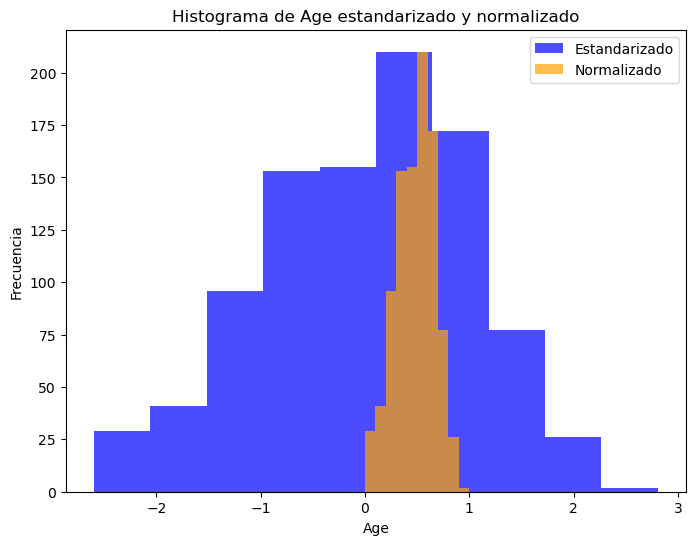

In [14]:
import matplotlib.pyplot as plt

# Creamos una figura
plt.figure(figsize=(8, 6))

# Trazamos histogramas para Age después de estandarizar (azul) y normalizar (naranja) los datos
plt.hist(df_std['Age'], alpha=0.7, color='blue', label='Estandarizado')
plt.hist(df_norm['Age'], alpha=0.7, color='orange', label='Normalizado')

# Añadimos un título y etiquetas de los ejes
plt.title('Histograma de Age estandarizado y normalizado')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

# Añadimos una leyenda
plt.legend()

# Mostramos el histograma
plt.show()

Escogemos si estandarizamos o normalizamos nuestras variables:

In [15]:
#df=df_norm
#df=df_std

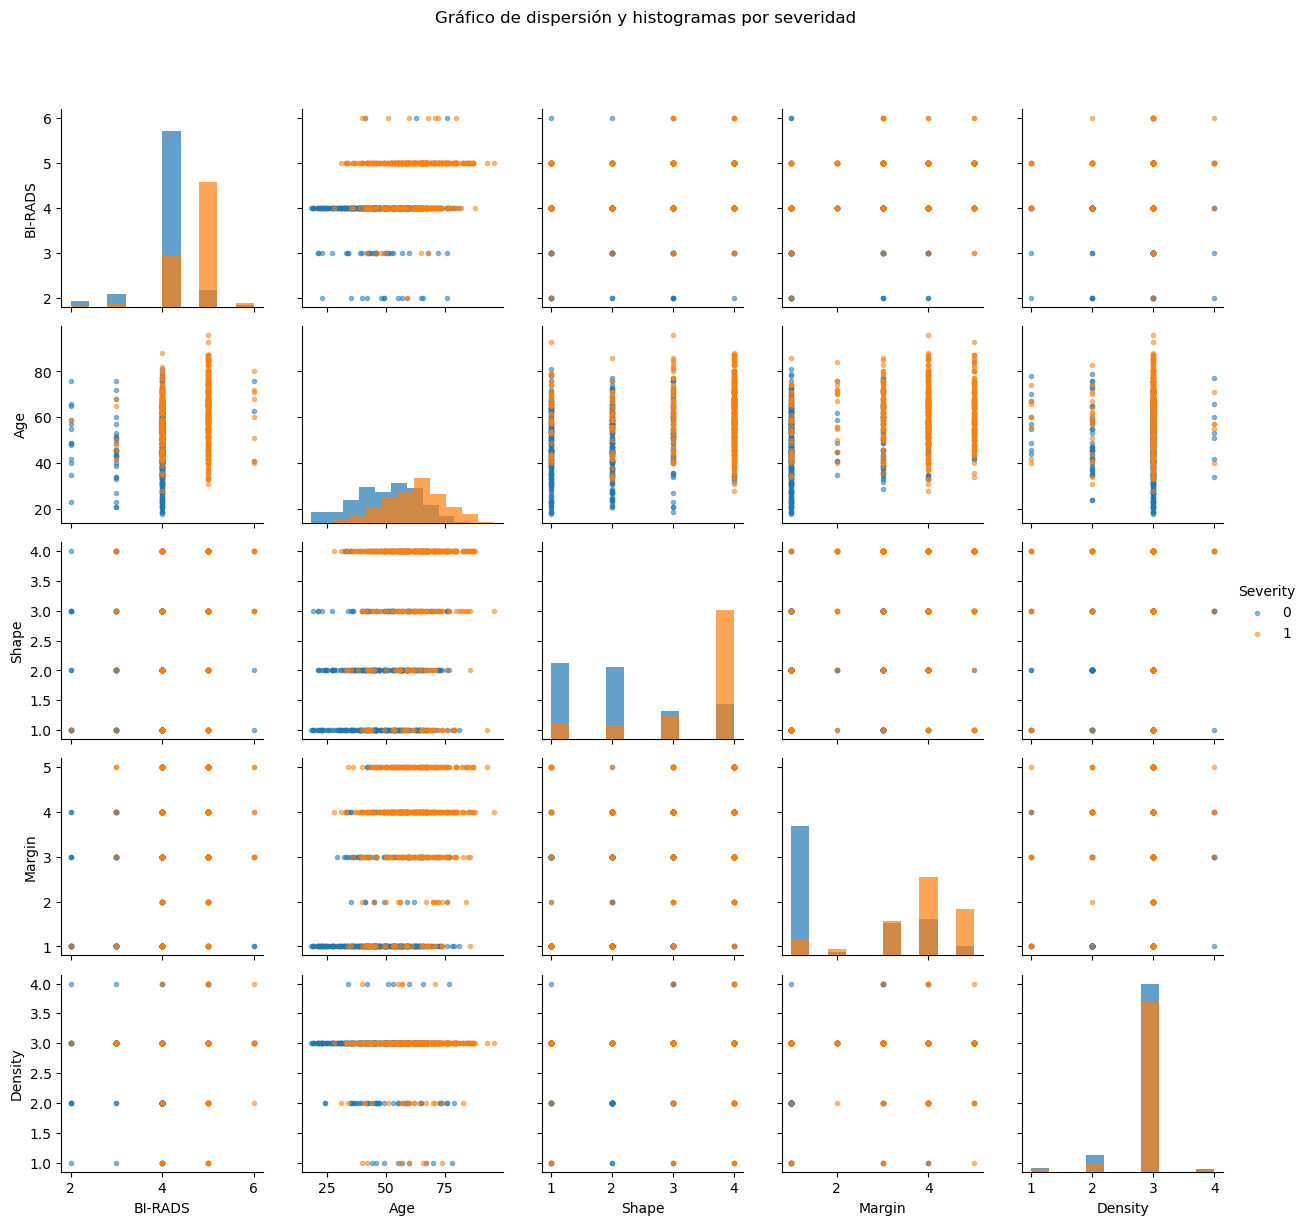

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos un PairGrid con Seaborn
disper = sns.PairGrid(df, hue='Severity')

# Mapeamos histogramas en la diagonal
disper = disper.map_diag(plt.hist, alpha=0.7)

# Mapeamos gráficos de dispersión fuera de la diagonal
disper = disper.map_offdiag(plt.scatter, marker='.', alpha=0.5)

# Añadimos un título
plt.subplots_adjust(top=0.9)
disper.fig.suptitle('Gráfico de dispersión y histogramas por severidad')

# Agregamos una leyenda
disper.add_legend(title='Severity')

# Mostramos el gráfico
plt.show()


MAPA DE CALOR

Diagrama que nos devuelve la relación lineal entre las variables.

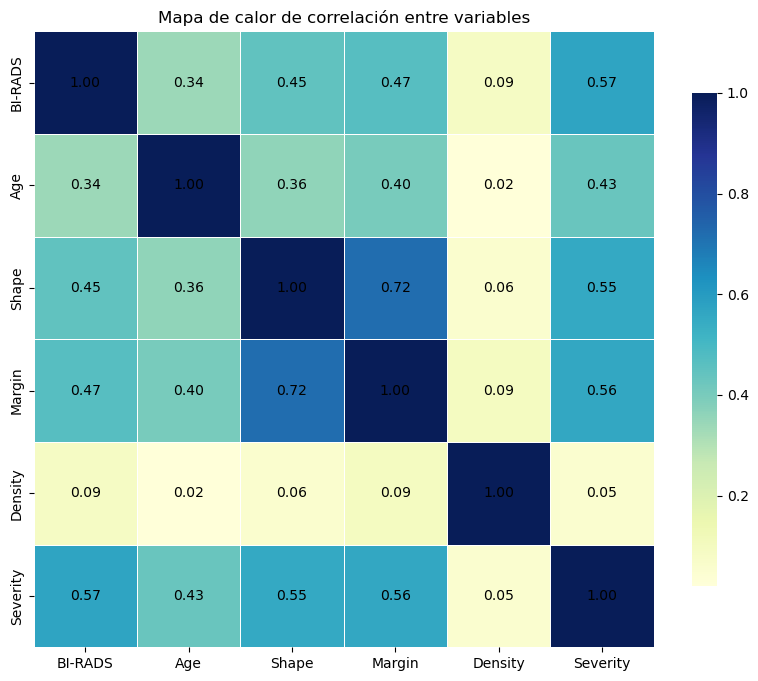

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creamos una figura y ejes con tamaño especificado
f, ax = plt.subplots(figsize=(10, 8))

# Calculamos la matriz de correlación
corr = df.corr()

# Generamos el mapa de calor con anotaciones, utilizando el mapa de color "YlGnBu"
sns.heatmap(corr, cmap="YlGnBu", fmt=".2f", linewidths=0.5, ax=ax, cbar_kws={'shrink': 0.8})

# Añadimos los valores dentro de cada celda
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j + 0.5, i + 0.5, '{:.2f}'.format(corr.iloc[i, j]), ha='center', va='center', color='black')

# Añadimos un título
plt.title('Mapa de calor de correlación entre variables')

# Mostramos el mapa de calor
plt.show()

Guardamos los datos procesados en un nuevo archivo: 

In [18]:
df=df.round(3)
df.to_csv('BaseDatos_Mod.csv', header=True, index=False)

### SUBCONJUNTOS DE ENTRENAMIENTO

TRAIN y TEST

In [19]:
# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df, df['Severity'], test_size=0.2, random_state=42)

# Imprimimos el número de observaciones en cada conjunto
print('Número de observaciones en TRAIN:', len(X_train))
print('Número de observaciones en TEST:', len(X_test))

Número de observaciones en TRAIN: 768
Número de observaciones en TEST: 193


Guardamos los subconjuntos TRAIN y TEST en dos archivos: 

In [20]:
X_train.to_csv('SubconjuntoTraining.csv', header=True, index=False)
X_test.to_csv('SubconjuntoTest.csv', header=True, index=False)

Representación de los subconjuntos para comprobar que su distribución es similar:

HISTOGRAMA DATOS TRAIN


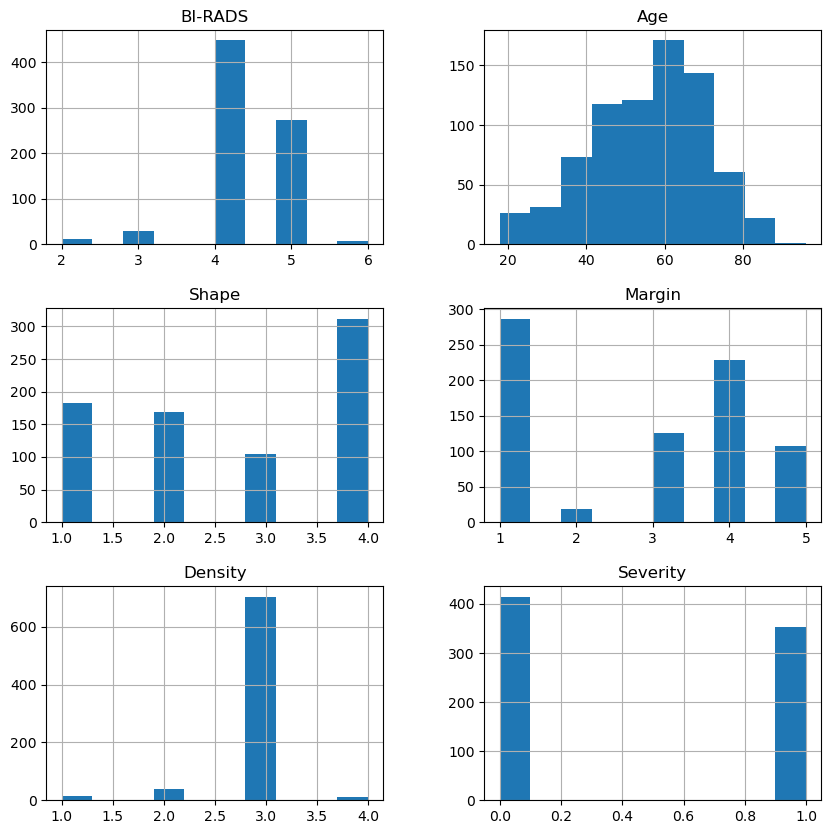

HISTOGRAMA DATOS TEST


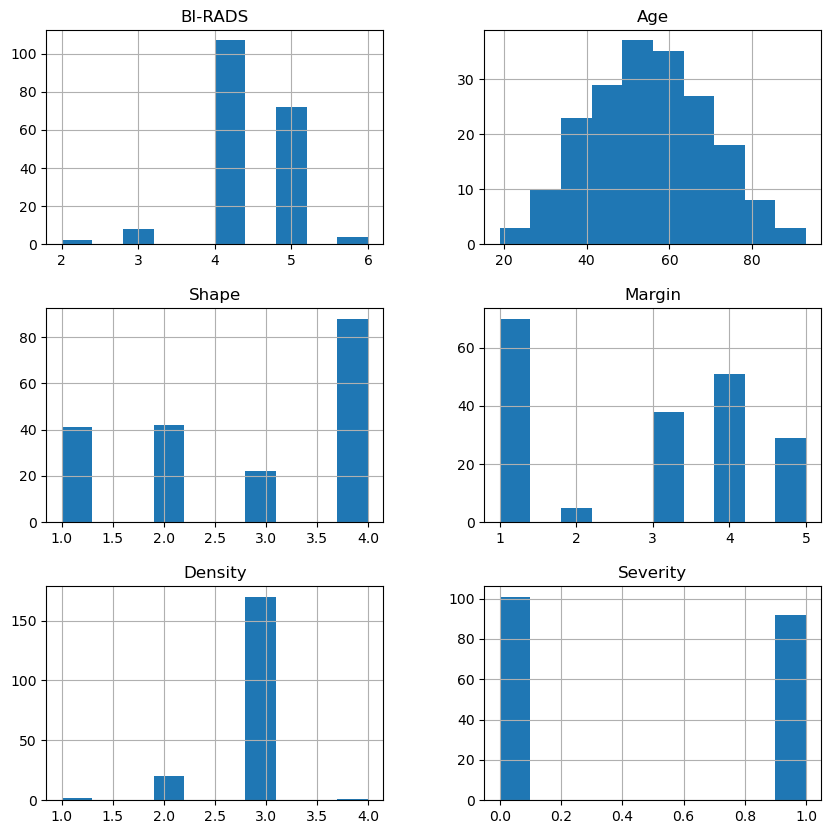

In [21]:
# Histogramas de los datos de entrenamiento
print(chr(27)+"[1;34m"+'HISTOGRAMA DATOS TRAIN')
X_train.hist(figsize=(10, 10))
plt.show()

# Histogramas de los datos de prueba
print(chr(27)+"[1;34m"+'HISTOGRAMA DATOS TEST')
X_test.hist(figsize=(10, 10))
plt.show()

In [22]:
X_train.describe().round(2)

,BI-RADS,Age,Shape,Margin,Density,Severity
count,768.00,768.00,768.00,768.00,768.00,768.00
mean,4.31,55.71,2.71,2.80,2.93,0.46
std,0.63,14.52,1.22,1.53,0.36,0.50
min,2.00,18.00,1.00,1.00,1.00,0.00
25%,4.00,45.00,2.00,1.00,3.00,0.00
50%,4.00,57.00,3.00,3.00,3.00,0.00
75%,5.00,66.00,4.00,4.00,3.00,1.00
max,6.00,96.00,4.00,5.00,4.00,1.00


In [23]:
X_test.describe().round(2)

,BI-RADS,Age,Shape,Margin,Density,Severity
count,193.00,193.00,193.00,193.00,193.00,193.00
mean,4.35,54.66,2.81,2.81,2.88,0.48
std,0.65,14.13,1.22,1.52,0.37,0.50
min,2.00,19.00,1.00,1.00,1.00,0.00
25%,4.00,44.00,2.00,1.00,3.00,0.00
50%,4.00,55.00,3.00,3.00,3.00,0.00
75%,5.00,65.00,4.00,4.00,3.00,1.00
max,6.00,93.00,4.00,5.00,4.00,1.00
